# Neural Networks Practical Workshop - Part 2: Building a Neural Network from Scratch

In this notebook, we'll implement a simple neural network from scratch using NumPy to understand the fundamental concepts.

## 1. Setup and Imports

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

## 2. Neural Network Implementation

Let's create a simple neural network class from scratch that can handle a basic feed-forward network with one hidden layer.

In [2]:
class NeuralNetworkFromScratch:
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
    
    def sigmoid(self, x):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        # Derivative of sigmoid for backpropagation
        return x * (1 - x)
    
    def softmax(self, x):
        # Softmax activation for output layer
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2
    
    def backward(self, X, y, output):
        # Backpropagation
        # Convert y to one-hot encoding
        y_one_hot = np.zeros((y.size, output.shape[1]))
        y_one_hot[np.arange(y.size), y] = 1
        
        # Calculate gradients
        dz2 = output - y_one_hot
        dW2 = np.dot(self.a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)
        
        return dW1, db1, dW2, db2
    
    def train(self, X, y, learning_rate=0.1, epochs=1000):
        # Training loop
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Calculate loss
            y_one_hot = np.zeros((y.size, output.shape[1]))
            y_one_hot[np.arange(y.size), y] = 1
            loss = -np.sum(y_one_hot * np.log(output + 1e-8)) / y.size
            losses.append(loss)
            
            # Backpropagation
            dW1, db1, dW2, db2 = self.backward(X, y, output)
            
            # Update weights and biases
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2
            
            # Print progress
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
        return losses
    
    def predict(self, X):
        # Make predictions
        output = self.forward(X)
        return np.argmax(output, axis=1)

## 3. Testing on a Toy Dataset

Let's test our neural network implementation on the XOR problem, which is a classic example that requires a non-linear decision boundary.

Epoch 0, Loss: 0.6932
Epoch 100, Loss: 0.6932
Epoch 200, Loss: 0.6932
Epoch 300, Loss: 0.6931
Epoch 400, Loss: 0.6931
Epoch 500, Loss: 0.6931
Epoch 600, Loss: 0.6931
Epoch 700, Loss: 0.6931
Epoch 800, Loss: 0.6931
Epoch 900, Loss: 0.6931
Epoch 1000, Loss: 0.6931
Epoch 1100, Loss: 0.6931
Epoch 1200, Loss: 0.6931
Epoch 1300, Loss: 0.6931
Epoch 1400, Loss: 0.6931
Epoch 1500, Loss: 0.6931
Epoch 1600, Loss: 0.6931
Epoch 1700, Loss: 0.6931
Epoch 1800, Loss: 0.6931
Epoch 1900, Loss: 0.6931
Epoch 2000, Loss: 0.6931
Epoch 2100, Loss: 0.6931
Epoch 2200, Loss: 0.6931
Epoch 2300, Loss: 0.6931
Epoch 2400, Loss: 0.6931
Epoch 2500, Loss: 0.6931
Epoch 2600, Loss: 0.6931
Epoch 2700, Loss: 0.6931
Epoch 2800, Loss: 0.6931
Epoch 2900, Loss: 0.6931
Epoch 3000, Loss: 0.6931
Epoch 3100, Loss: 0.6931
Epoch 3200, Loss: 0.6931
Epoch 3300, Loss: 0.6931
Epoch 3400, Loss: 0.6931
Epoch 3500, Loss: 0.6931
Epoch 3600, Loss: 0.6931
Epoch 3700, Loss: 0.6931
Epoch 3800, Loss: 0.6931
Epoch 3900, Loss: 0.6931
Epoch 4000, 

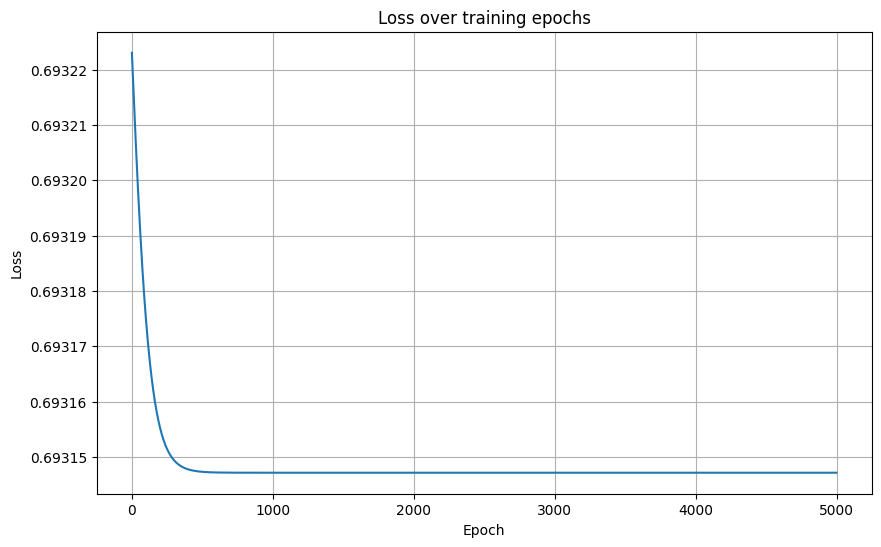

Predictions: [1 0 1 0]
Actual:      [0 1 1 0]
Accuracy: 50.00%


In [4]:
# Create a simple dataset (XOR problem)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize and train the network
nn_scratch = NeuralNetworkFromScratch(input_size=2, hidden_size=4, output_size=2)
losses = nn_scratch.train(X, y, learning_rate=0.5, epochs=5000)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Loss over training epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Test the network
predictions = nn_scratch.predict(X)
print("Predictions:", predictions)
print("Actual:     ", y)
print(f"Accuracy: {np.mean(predictions == y) * 100:.2f}%")

## 4. Visualizing the Decision Boundary

Let's create a visualization of the decision boundary learned by our neural network for the XOR problem.

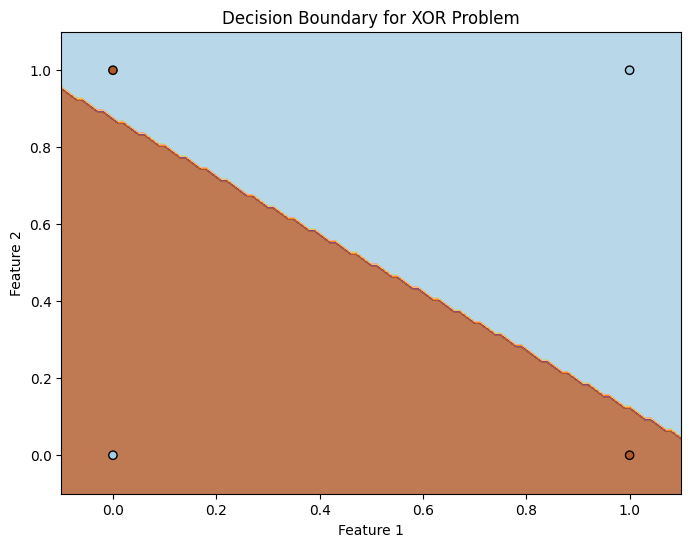

In [5]:
# Create a mesh grid
h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the mesh grid points
Z = nn_scratch.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for XOR Problem')
plt.show()

## 5. Building a Multi-Layer Neural Network from Scratch

Now, let's extend our implementation to handle multiple hidden layers. This implementation will be more flexible and can be used for more complex tasks.

In [6]:
class MultiLayerNeuralNetwork:
    def __init__(self, layer_sizes):
        """Initialize a neural network with multiple layers.
        
        Args:
            layer_sizes: List of integers, representing the size of each layer
                         (including input and output layers)
        """
        self.num_layers = len(layer_sizes) - 1
        self.layer_sizes = layer_sizes
        
        # Initialize weights and biases
        self.weights = []
        self.biases = []
        
        for i in range(self.num_layers):
            # Xavier initialization for weights
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 
                               np.sqrt(1 / layer_sizes[i]))
            self.biases.append(np.zeros((1, layer_sizes[i+1])))
    
    def relu(self, x):
        """ReLU activation function."""
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        """Derivative of ReLU function."""
        return np.where(x > 0, 1, 0)
    
    def softmax(self, x):
        """Softmax activation function."""
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def forward(self, X):
        """Forward propagation."""
        self.Z = []
        self.A = [X]  # Input as the first activation
        
        # Hidden layers with ReLU activation
        for i in range(self.num_layers - 1):
            z = np.dot(self.A[-1], self.weights[i]) + self.biases[i]
            a = self.relu(z)
            self.Z.append(z)
            self.A.append(a)
        
        # Output layer with softmax activation
        z = np.dot(self.A[-1], self.weights[-1]) + self.biases[-1]
        a = self.softmax(z)
        self.Z.append(z)
        self.A.append(a)
        
        return self.A[-1]
    
    def backward(self, X, y, output):
        """Backward propagation."""
        batch_size = X.shape[0]
        gradients = {'dW': [], 'db': []}
        
        # Convert y to one-hot encoding
        y_one_hot = np.zeros((y.size, output.shape[1]))
        y_one_hot[np.arange(y.size), y] = 1
        
        # Output layer error
        dZ = output - y_one_hot
        
        for layer in range(self.num_layers - 1, -1, -1):
            # Calculate gradients for this layer
            dW = (1/batch_size) * np.dot(self.A[layer].T, dZ)
            db = (1/batch_size) * np.sum(dZ, axis=0, keepdims=True)
            
            # Store gradients
            gradients['dW'].insert(0, dW)
            gradients['db'].insert(0, db)
            
            if layer > 0:
                # Compute error for previous layer
                dA = np.dot(dZ, self.weights[layer].T)
                dZ = dA * self.relu_derivative(self.A[layer])
        
        return gradients
    
    def train(self, X, y, learning_rate=0.01, epochs=1000, batch_size=32, print_every=100):
        """Training the neural network."""
        n_samples = X.shape[0]
        n_batches = max(n_samples // batch_size, 1)
        
        losses = []
        accuracies = []
        
        for epoch in range(epochs):
            # Shuffle the data
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            epoch_loss = 0
            epoch_correct = 0
            
            for i in range(n_batches):
                start_idx = i * batch_size
                end_idx = min((i + 1) * batch_size, n_samples)
                
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]
                
                # Forward pass
                output = self.forward(X_batch)
                
                # Calculate loss
                y_one_hot = np.zeros((y_batch.size, output.shape[1]))
                y_one_hot[np.arange(y_batch.size), y_batch] = 1
                batch_loss = -np.sum(y_one_hot * np.log(output + 1e-8)) / y_batch.size
                epoch_loss += batch_loss * (end_idx - start_idx)
                
                # Calculate accuracy
                predictions = np.argmax(output, axis=1)
                epoch_correct += np.sum(predictions == y_batch)
                
                # Backward pass
                gradients = self.backward(X_batch, y_batch, output)
                
                # Update weights and biases
                for layer in range(self.num_layers):
                    self.weights[layer] -= learning_rate * gradients['dW'][layer]
                    self.biases[layer] -= learning_rate * gradients['db'][layer]
            
            # Calculate epoch loss and accuracy
            epoch_loss /= n_samples
            epoch_accuracy = epoch_correct / n_samples * 100
            
            losses.append(epoch_loss)
            accuracies.append(epoch_accuracy)
            
            if epoch % print_every == 0:
                print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")
        
        return losses, accuracies
    
    def predict(self, X):
        """Make predictions."""
        output = self.forward(X)
        return np.argmax(output, axis=1)

## 6. Testing the Multi-Layer Neural Network

Epoch 0, Loss: 0.6959, Accuracy: 50.00%
Epoch 200, Loss: 0.6685, Accuracy: 75.00%
Epoch 400, Loss: 0.5386, Accuracy: 75.00%
Epoch 600, Loss: 0.2800, Accuracy: 100.00%
Epoch 800, Loss: 0.0693, Accuracy: 100.00%
Epoch 1000, Loss: 0.0354, Accuracy: 100.00%
Epoch 1200, Loss: 0.0232, Accuracy: 100.00%
Epoch 1400, Loss: 0.0171, Accuracy: 100.00%
Epoch 1600, Loss: 0.0134, Accuracy: 100.00%
Epoch 1800, Loss: 0.0110, Accuracy: 100.00%


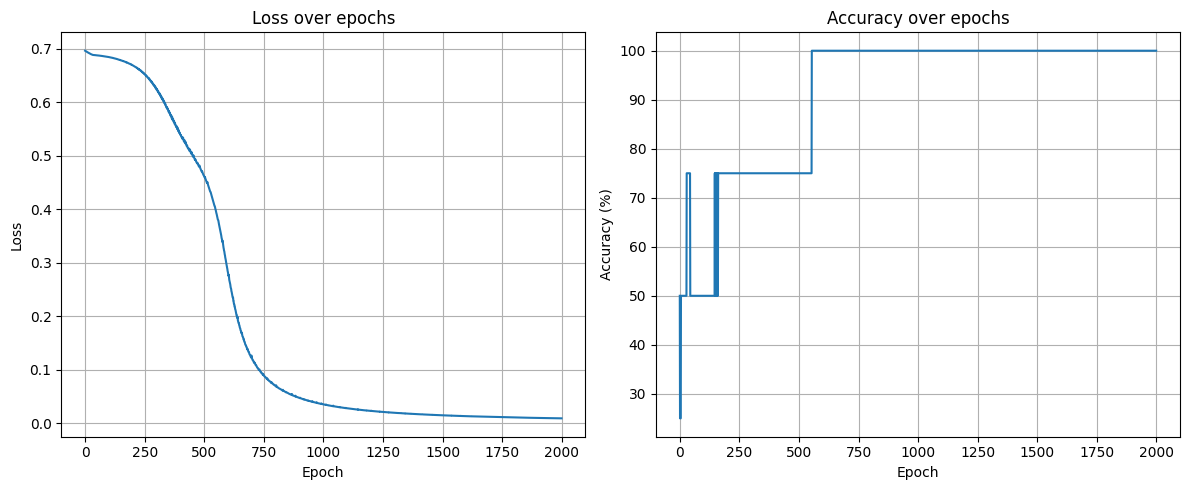

Predictions: [0 1 1 0]
Actual:      [0 1 1 0]
Accuracy: 100.00%


In [7]:
# Test the multi-layer neural network on the XOR problem
layer_sizes = [2, 8, 4, 2]  # Input, hidden layers, output
mlnn = MultiLayerNeuralNetwork(layer_sizes)

losses, accuracies = mlnn.train(X, y, learning_rate=0.05, epochs=2000, batch_size=4, print_every=200)

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Test predictions
predictions = mlnn.predict(X)
print("Predictions:", predictions)
print("Actual:     ", y)
print(f"Accuracy: {np.mean(predictions == y) * 100:.2f}%")

## 7. Visualizing the Decision Boundary of the Multi-Layer Network

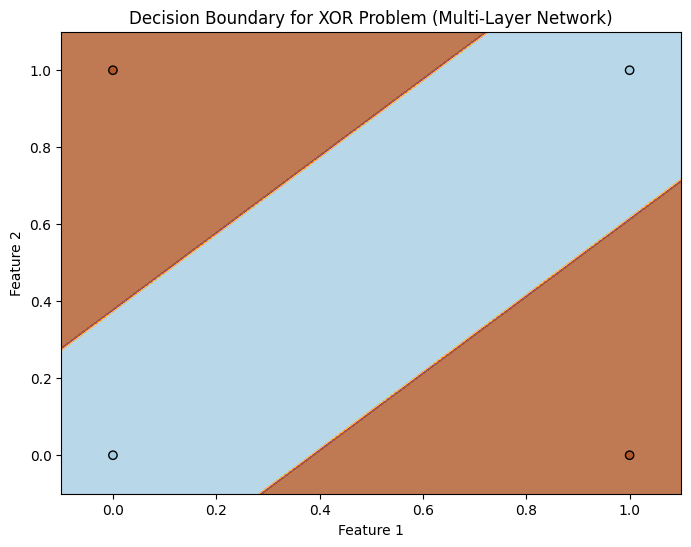

In [8]:
# Create a mesh grid
h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the mesh grid points
Z = mlnn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for XOR Problem (Multi-Layer Network)')
plt.show()

## Next Steps

Now that we have built and tested neural networks from scratch, let's move on to working with a real-world dataset. In the next notebook, `03_mnist_dataset.ipynb`, we'll explore the MNIST dataset for handwritten digit recognition.